## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split
sys.path.append("../")

In [2]:
from src.nnsrc.dense import NeuralNetwork

## Classification on exemplary provided datasets

### Binary classification

In [7]:
data = pd.read_csv('../src/data/classification/data.simple.test.100.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 1], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'tanh'],
                    error_function='hinge',
                    bias=True, problem='classification_binary')
print("Shape of NN:")
for layer in nn.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 1


In [3]:
data = pd.read_csv('../src/data/classification/data.simple.test.100.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 2], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'softmax'],
                    bias=True, problem='classification')
print("Shape of NN:")
for layer in nn.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 2


In [4]:
y = y-1  # for binary crossentropy
nn.train(X.T, y, 5000, 32, 0.7)

print("CLASSIFICATION DONE")
y_hat = nn.predict(X.T)

CLASSIFICATION DONE


In [6]:
nn.multiclass_accuracy(y_hat, y)

1.0

In [9]:
nn.binary_accuracy(y_hat, y)

0.47

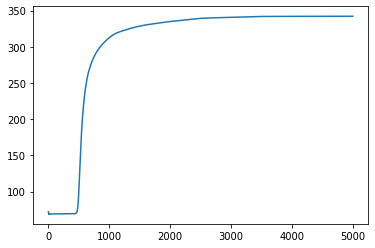

In [7]:
plt.plot(list(range(len(nn.history['cost']))), nn.history['cost'])

### Multiclass classification

### High learning rate

In [8]:
data = pd.read_csv('../src/data/classification/data.three_gauss.train.500.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn2 = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 3], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'softmax'],
                    bias=True, problem='classification')
print("Shape of NN:")
for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 3


In [9]:
y.shape

(1500,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, )

In [11]:
y_train = y_train-1
nn2.train(X_train.T, y_train, 5000, 32, 0.07)

print("CLASSIFICATION DONE")
y_hat = nn2.predict(X.T)

CLASSIFICATION DONE


In [7]:
y_hat

array([[9.87230903e-01, 9.97977437e-01, 8.85291701e-01, ...,
        6.19420731e-04, 3.40869523e-01, 5.18581487e-02],
       [8.67582912e-05, 1.53426649e-06, 2.56387451e-03, ...,
        3.66176201e-01, 7.45452502e-02, 1.92011443e-02],
       [1.26823384e-02, 2.02102893e-03, 1.12144425e-01, ...,
        6.33204378e-01, 5.84585226e-01, 9.28940707e-01]])

In [8]:
y=y-1

In [9]:
nn2.multiclass_accuracy(y_hat, y)

0.93

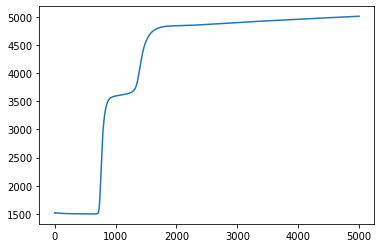

In [10]:
plt.plot(list(range(len(nn2.history['cost']))), nn2.history['cost'])

In [15]:
nn2.history['cost'][100]

2605.7544275489427

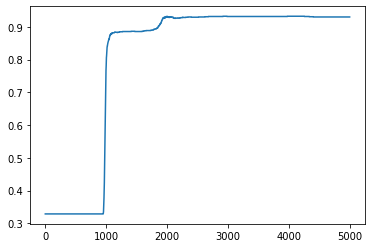

In [12]:
plt.plot(list(range(len(nn2.history['metrics']))), nn2.history['metrics'])

In [27]:
y_test = y_test-1
y_hat = nn2.predict(X_test.T)
nn2.get_multiclass_accuracy(y_hat, y_test)

0.9266666666666666

### Lower learning rate

In [28]:
data = pd.read_csv('../src/data/classification/data.three_gauss.train.500.csv')

X = data[["x", "y"]].values
y = data["cls"].values

nn2 = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[2, 10,  100, 3], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'softmax'],
                    bias=True, problem='classification')
print("Shape of NN:")
for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 2 2
Dense_1 2 10
Dense_2 10 100
Dense_3 100 3


In [29]:
y = y-1
nn2.train(X.T, y, 10000, 0.4)

print("CLASSIFICATION DONE")
y_hat = nn2.predict(X.T)

CLASSIFICATION DONE


In [30]:
nn2.get_multiclass_accuracy(y_hat, y)

0.9166666666666666

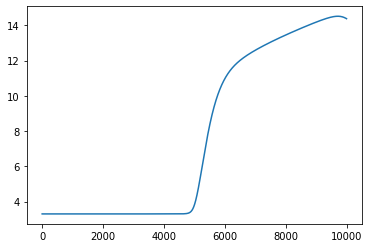

In [31]:
plt.plot(list(range(len(nn2.history['cost']))), nn2.history['cost'])

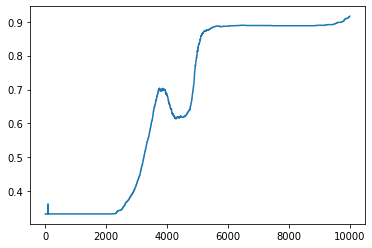

In [32]:
plt.plot(list(range(len(nn2.history['metrics']))), nn2.history['metrics'])

## Classification on external datasets

In [53]:
data = pd.read_csv('../src/data/classification_ext/SAheart.data.txt', header=None)
labels = pd.read_csv('../src/data/classification_ext/SAheart.labels.txt', header=None)

In [54]:
data

,0,1,2,3,4,5,6,7
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58
458,182,4.20,4.41,32.10,52,28.61,18.72,52
459,108,3.00,1.59,15.23,40,20.09,26.64,55
460,118,5.40,11.61,30.79,64,27.35,23.97,40


In [55]:
labels.shape

(462, 1)

In [65]:
X = data.values
y = labels.values.reshape((labels.shape[0], ))

nn2 = NeuralNetwork(seed=1, n_layers=4,
                    n_neurons_per_layer=[8, 10,  100, 1], act_funcs=['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid'],
                    bias=True, problem='classification_binary')
print("Shape of NN:")
for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

Shape of NN:
Dense_0 8 8
Dense_1 8 10
Dense_2 10 100
Dense_3 100 1


In [84]:
nn2.train(X.T, y, 10000, 0.3)

print("CLASSIFICATION DONE")
y_hat = nn2.predict(X.T)

CLASSIFICATION DONE


In [85]:
nn2.get_binary_accuracy_value(y_hat, y)

0.6731601731601732

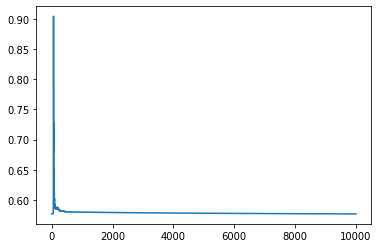

In [86]:
plt.plot(list(range(len(nn2.history['cost']))), nn2.history['cost'])

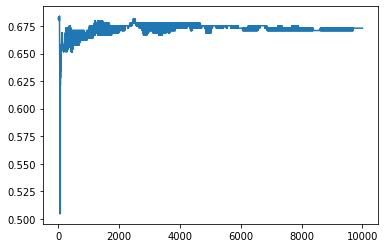

In [87]:
plt.plot(list(range(len(nn2.history['metrics']))), nn2.history['metrics'])